# Analyzing summary texts
-------------------

> <i>Description: In this notebook, we research if there are any significant patterns or insights in summary data.</i>

Input Files: 
1) text_data_classes_sentiment.xlsx

Output:
1) summary.xlsx

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import openpyxl
from collections import Counter

* text_data_classes_sentiment.xlsx is a result of text classification and sentiment determination. 

In [2]:
df = pd.read_excel('text_data_classes_sentiment.xlsx')
# Saving only neccessary columns
df = df[df['year'] >= 2019][['uuid', 'date', 'year', 'position', 'position_code', 'department', 'summary_translated', 'country', 'file', 'summary_class', 'summary_sentiment']]

## Visualization

In [3]:
def plot_sentiment_counts(df, sentiment_column='suggestion_sentiment', size=(6,4)):
    """
    Plots a bar chart of sentiment counts within the specified sentiment column of a DataFrame.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the sentiment data.
    - sentiment_column (str): The column in the DataFrame where sentiment values ('neutral', 'positive', 'negative') are stored.
                              Defaults to 'suggestion_sentiment'.
    - size (tuple): The size of the plot in inches, provided as (width, height). Defaults to (6,4).

    """
    # Calculate the value counts for the sentiment column (neutral, positive, negative)
    sentiment_counts = df[df[sentiment_column].notna()][sentiment_column].value_counts()
    
    # Create the bar plot
    plt.figure(figsize=size)
    sentiment_counts.plot(kind='bar', color=['teal', 'orange', 'salmon'])
    
    # Add title and labels
    plt.title(f'Sentiment Counts for {sentiment_column}', fontsize=16)
    plt.xlabel('Sentiment', fontsize=12)
    plt.ylabel('Count of Reviews', fontsize=12)
    
    # Display the plot
    plt.xticks(rotation=0)
    plt.show()

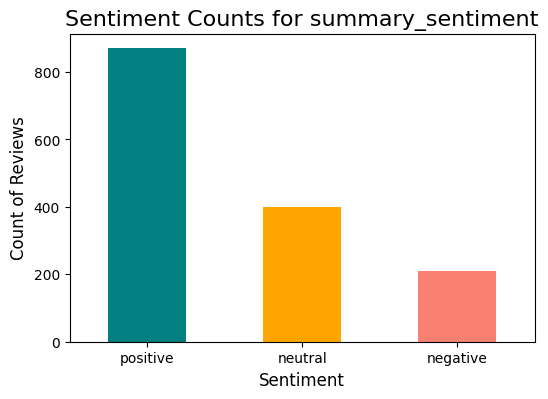

In [4]:
plot_sentiment_counts(df, sentiment_column='summary_sentiment')

In [5]:
category_map = ["Diversity & Equity & Inclusion", "Authenticity", "Collaboration & Teamwork & Social Culture", 
                "Creativity and Innovation", "Professional Development and Continuous Learning", "Youthful Spirit", 
                "Digital Transformation & Process Management", "Leadership & Communication", "Fashion and Lifestyle Benefits", 
                "Health and Well-being", "Work-Life Balance & Flexibility", "Mobility & Accessibility", 
                "Financial Compensation & Benefits", "Device Leasing and Corporate Benefits", "Social and Recreational Benefits"]

In [23]:
def plot_category_distribution(df, category_column='suggestion_class', department_column=None, position_column=None, department=None, position=None, category_map=None, figsize=(10, 6)):
    """
    Plots the distribution of categories and their percentages from a specified column in a DataFrame,
    with optional filtering by department and position.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the category data.
    - category_column (str): The column in the DataFrame with comma-separated category values. Defaults to 'suggestion_class'.
    - department_column (str): The column in the DataFrame indicating department names. Default is None, meaning no filtering by department.
    - position_column (str): The column in the DataFrame indicating position names. Default is None, meaning no filtering by position.
    - department (str or list): Specific department(s) to include. If None, includes all departments.
    - position (str or list): Specific position(s) to include. If None, includes all positions.
    - category_map (dict): An optional dictionary to filter categories based on specific mapping. Only categories present in this map will be plotted.
    - figsize (tuple): The size of the plot in inches, provided as (width, height). Defaults to (10, 6).

    """
    # Apply department filtering if specified
    if department_column and department:
        if isinstance(department, list):
            df = df[df[department_column].isin(department)]
        else:
            df = df[df[department_column] == department]

    # Apply position filtering if specified
    if position_column and position:
        if isinstance(position, list):
            df = df[df[position_column].isin(position)]
        else:
            df = df[df[position_column] == position]
    
    # Split the category column entries into individual categories and count their frequencies
    categories = df[category_column].dropna().str.split(', ').sum()
    category_counts = Counter(categories)
    
    # Filter categories based on the provided category_map, if any
    if category_map:
        filtered_category_counts = {category: count for category, count in category_counts.items() if category in category_map}
    else:
        filtered_category_counts = category_counts

    # Sort category counts in ascending order
    sorted_category_counts = dict(sorted(filtered_category_counts.items(), key=lambda item: item[1], reverse=False))

    # Calculate the percentage each category contributes to the total number of mentions
    total_mentions = sum(sorted_category_counts.values())
    percentages = [(count / total_mentions) * 100 for count in sorted_category_counts.values()]

    # Plotting the sorted frequencies with percentages
    plt.figure(figsize=figsize)
    plt.barh(list(sorted_category_counts.keys()), list(sorted_category_counts.values()), color='teal')

    # Add percentage text next to the bars
    for index, (count, percentage) in enumerate(zip(sorted_category_counts.values(), percentages)):
        plt.text(count, index, f'{percentage:.2f}%', va='center')

    plt.xlabel('Total Number of Mentions')
    plt.ylabel('Core Values & Benefits')
    plt.title('Frequency of Core Values & Benefits with Percentage of Total Mentions')
    plt.tight_layout()
    plt.show()

In [8]:
# Creating extra dataframes for each sentiment
df_positive = df[df['summary_sentiment'] == 'positive']
df_negative = df[df['summary_sentiment'] == 'negative']
df_neutral = df[df['summary_sentiment'] == 'neutral']

### Frequency of Core Values & Benefits with Percentage of Total Mentions for all sentiments

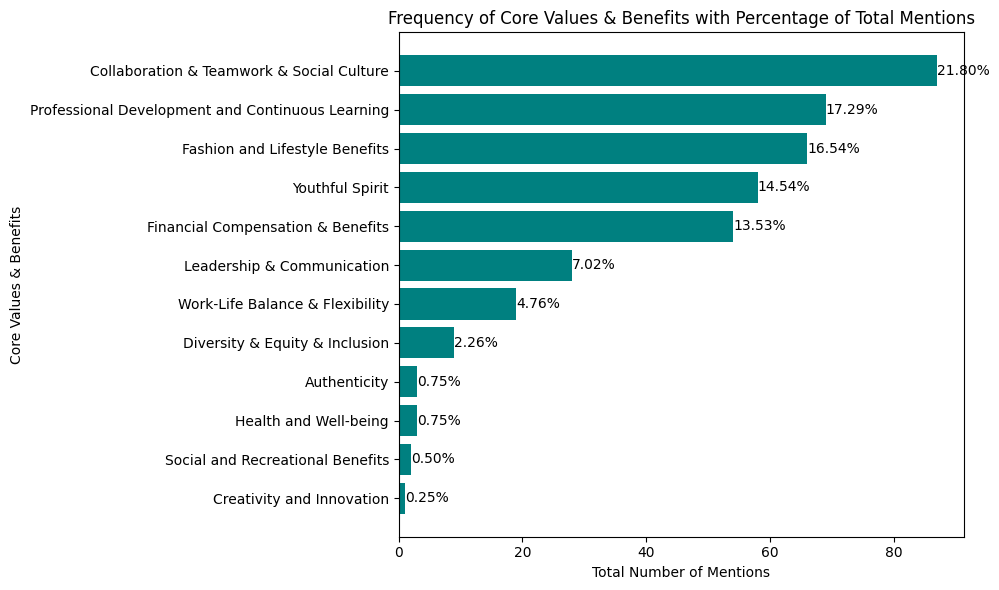

In [27]:
plot_category_distribution(
    df=df, 
    category_column='summary_class', 
    department_column='department', 
    position_column='position', 
    department=None,  # None includes all departments
    position=None,    # None includes all positions
    category_map=category_map, # Optionally filter categories with a map, or leave as None for all categories
    figsize=(10, 6)
)

### Frequency of Core Values & Benefits with Percentage of Total Mentions for positive sentiment

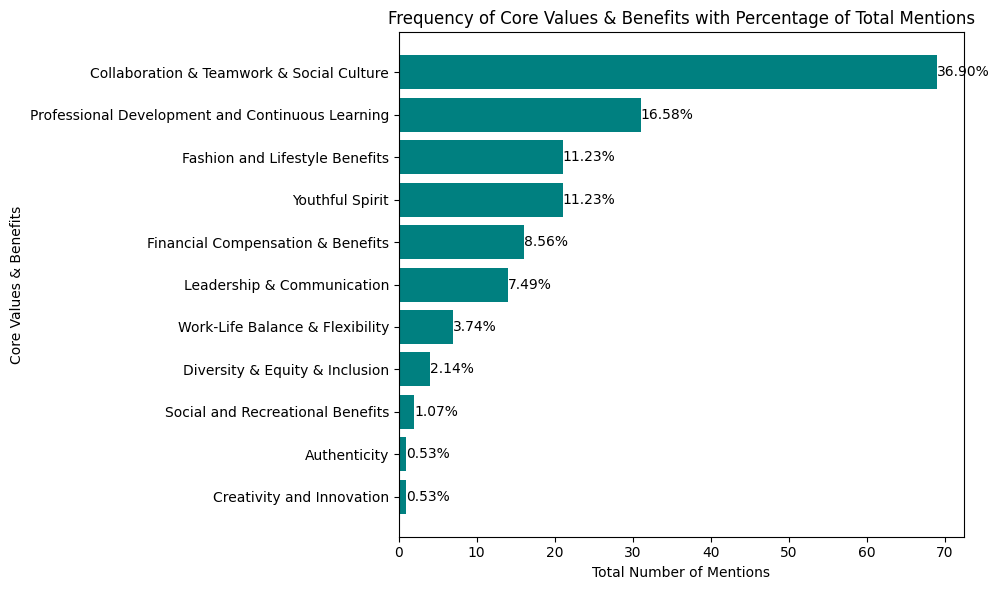

In [28]:
plot_category_distribution(
    df=df_positive, 
    category_column='summary_class', 
    department_column='department', 
    position_column='position', 
    department=None,  # None includes all departments
    position=None,    # None includes all positions
    category_map=category_map, # Optionally filter categories with a map, or leave as None for all categories
    figsize=(10, 6)
)

### Frequency of Core Values & Benefits with Percentage of Total Mentions for negative sentiment

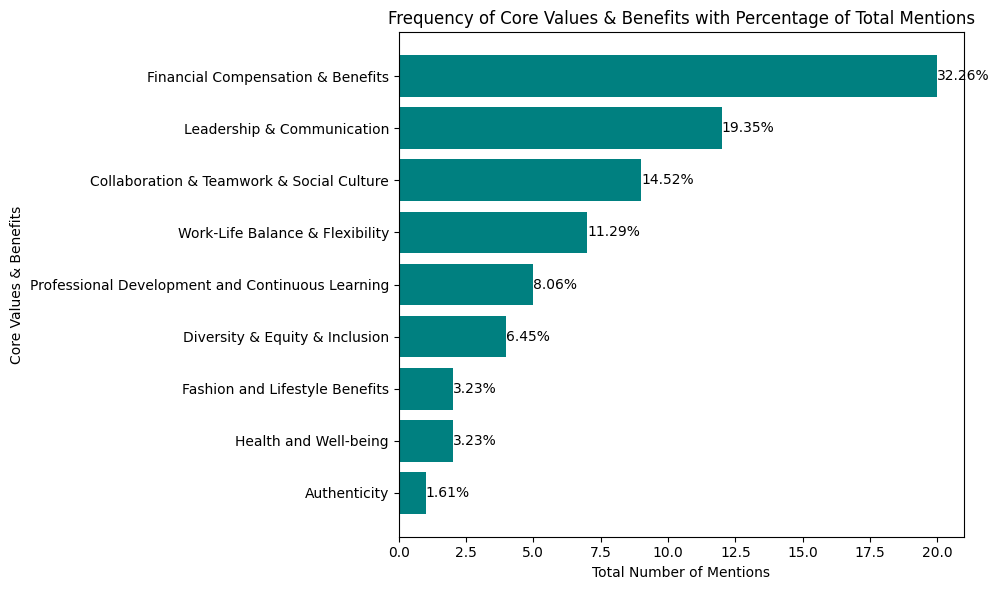

In [30]:
plot_category_distribution(
    df=df_negative, 
    category_column='summary_class', 
    department_column='department', 
    position_column='position', 
    department=None,  # None includes all departments
    position=None,    # None includes all positions
    category_map=category_map, # Optionally filter categories with a map, or leave as None for all categories
    figsize=(10, 6)
)

### Frequency of Core Values & Benefits with Percentage of Total Mentions for neutral sentiment

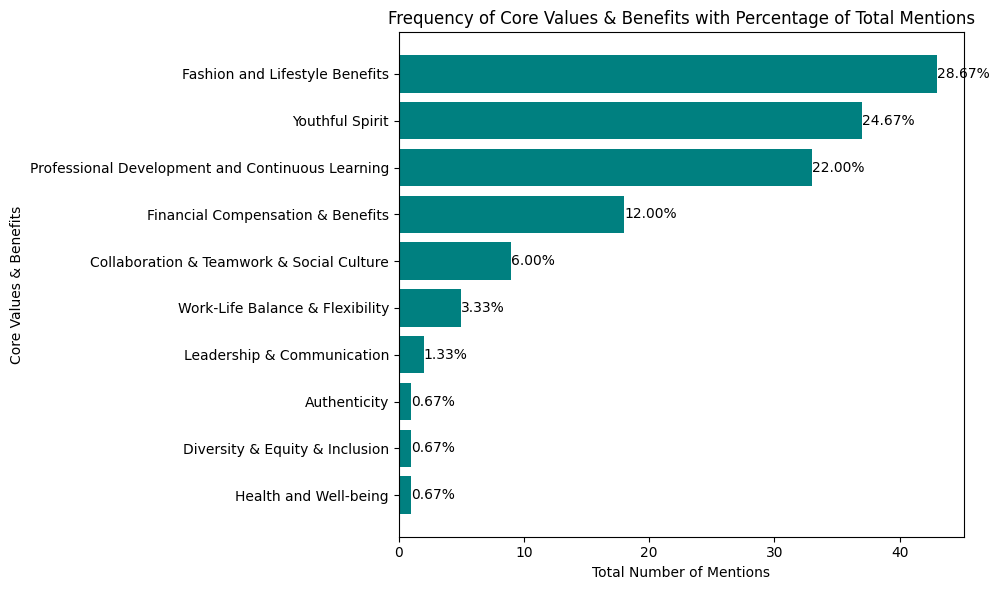

In [31]:
plot_category_distribution(
    df=df_neutral, 
    category_column='summary_class', 
    department_column='department', 
    position_column='position', 
    department=None,  # None includes all departments
    position=None,    # None includes all positions
    category_map=category_map, # Optionally filter categories with a map, or leave as None for all categories
    figsize=(10, 6)
)

### Distribution by position and department

In [16]:
def plot_department_position_distribution(df, category_column='summary_class', department_column='department', position_column='position', min_reviews=50, figsize=(15, 10)):
    """
    Plots the distribution of non-empty category entries by department and position.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing department and position data.
    - category_column (str): The column to filter non-empty entries. Defaults to 'summary_class'.
    - department_column (str): The column indicating department names. Defaults to 'department'.
    - position_column (str): The column indicating position names. Defaults to 'position'.
    - min_reviews (int): The minimum number of reviews required to include a department-position group. Defaults to 50.
    - figsize (tuple): The size of the plot in inches, provided as (width, height). Defaults to (15, 10).

    """
    # Filter data to exclude rows with empty category entries
    filtered_df = df[df[category_column].notna() & (df[category_column] != '')]

    # Group by department and position, then filter to keep rows with more than the minimum number of reviews
    department_position_counts = filtered_df.groupby([department_column, position_column]).size().reset_index(name='count')
    department_position_counts = department_position_counts[department_position_counts['count'] > min_reviews]

    # Get unique departments for plotting
    departments = department_position_counts[department_column].unique()

    # Set up a 2x2 plot layout or adjust based on the number of departments
    n_plots = min(4, len(departments))  # Change to fit all departments as needed
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    axes = axes.flatten()

    # Loop through departments and create a bar chart for each
    for i, department in enumerate(departments[:n_plots]):
        subset = department_position_counts[department_position_counts[department_column] == department]
        axes[i].bar(subset[position_column], subset['count'], color='teal')
        axes[i].set_title(f'{department} - Distribution by Position')
        axes[i].set_xlabel('Position')
        axes[i].set_ylabel('Number of Non-Empty Rows')

    # Adjust layout
    plt.tight_layout()
    plt.show()


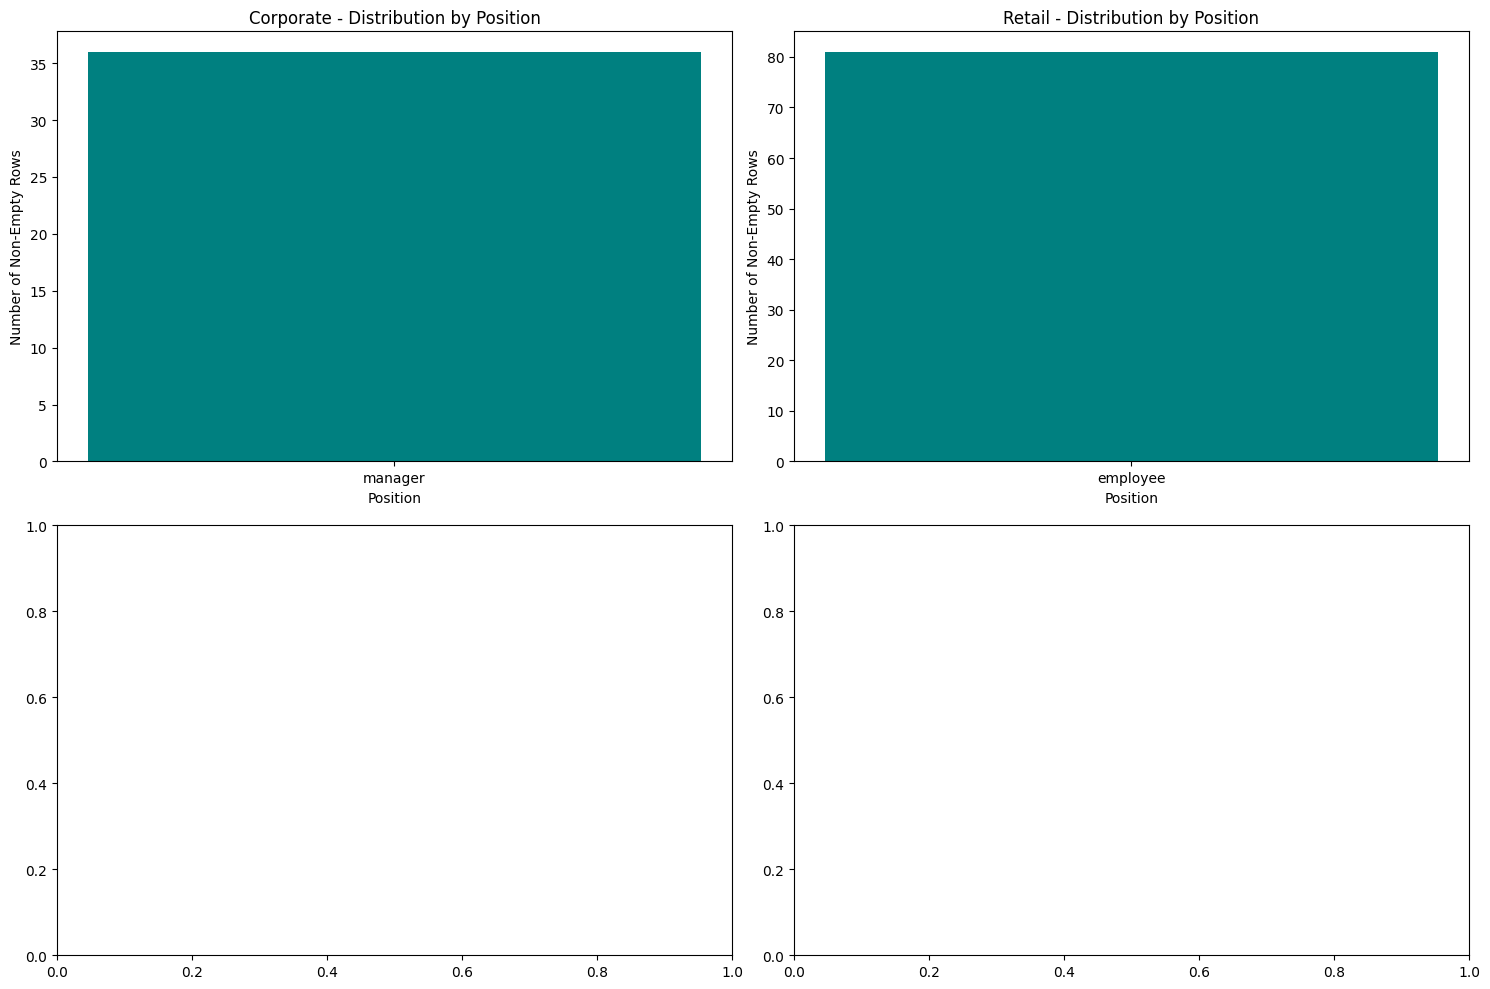

In [35]:
plot_department_position_distribution(df, category_column='summary_class', department_column='department', position_column='position', min_reviews=30, figsize=(15, 10))

### Results for manager in corporate

#### All sentiments:

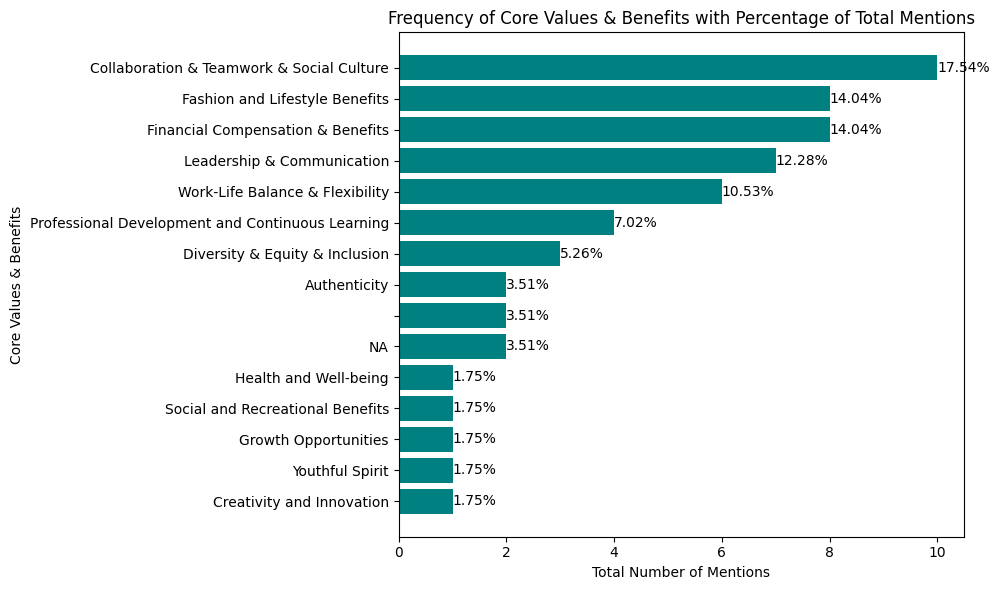

In [36]:
plot_category_distribution(
    df=df, 
    category_column='summary_class', 
    department_column='department', 
    position_column='position', 
    department='Corporate',  # None includes all departments
    position='manager',    # None includes all positions
    category_map=None, # Optionally filter categories with a map, or leave as None for all categories
    figsize=(10, 6)
)

#### Positive sentiment:

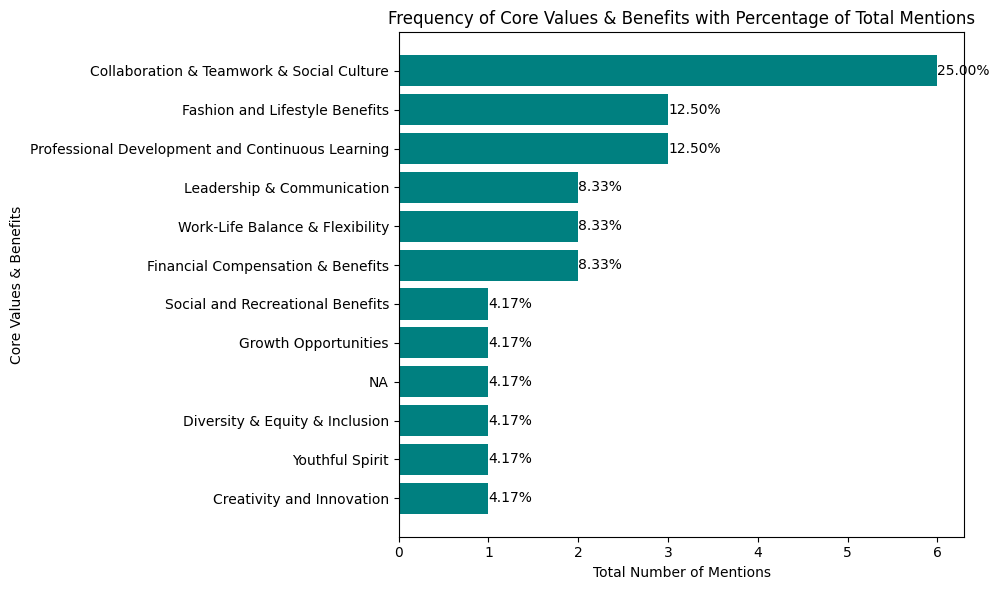

In [37]:
plot_category_distribution(
    df=df_positive, 
    category_column='summary_class', 
    department_column='department', 
    position_column='position', 
    department='Corporate',  # None includes all departments
    position='manager',    # None includes all positions
    category_map=None, # Optionally filter categories with a map, or leave as None for all categories
    figsize=(10, 6)
)

#### Negative sentiment:

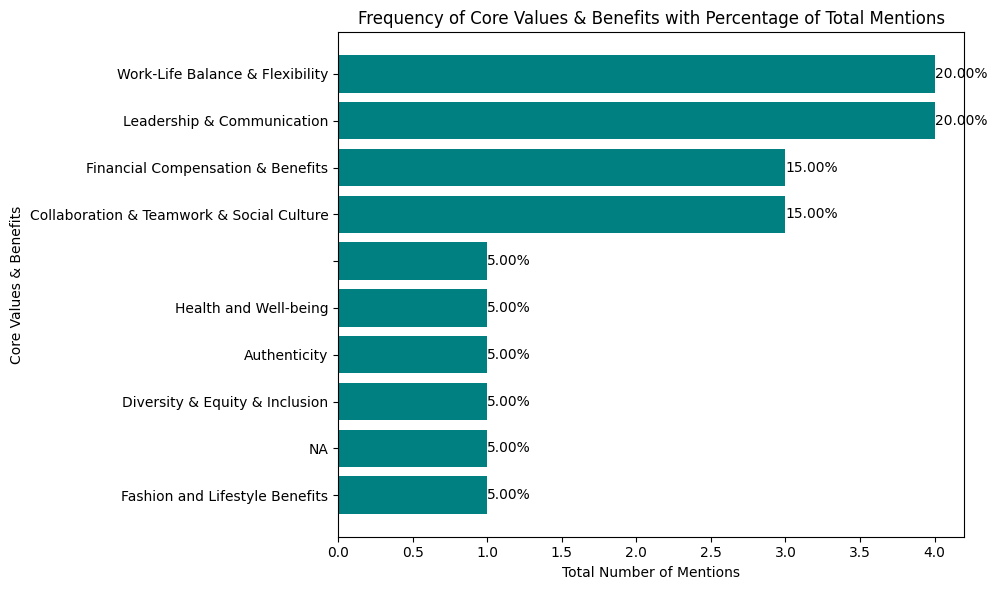

In [38]:
plot_category_distribution(
    df=df_negative, 
    category_column='summary_class', 
    department_column='department', 
    position_column='position', 
    department='Corporate',  # None includes all departments
    position='manager',    # None includes all positions
    category_map=None, # Optionally filter categories with a map, or leave as None for all categories
    figsize=(10, 6)
)

#### Neutral sentiment

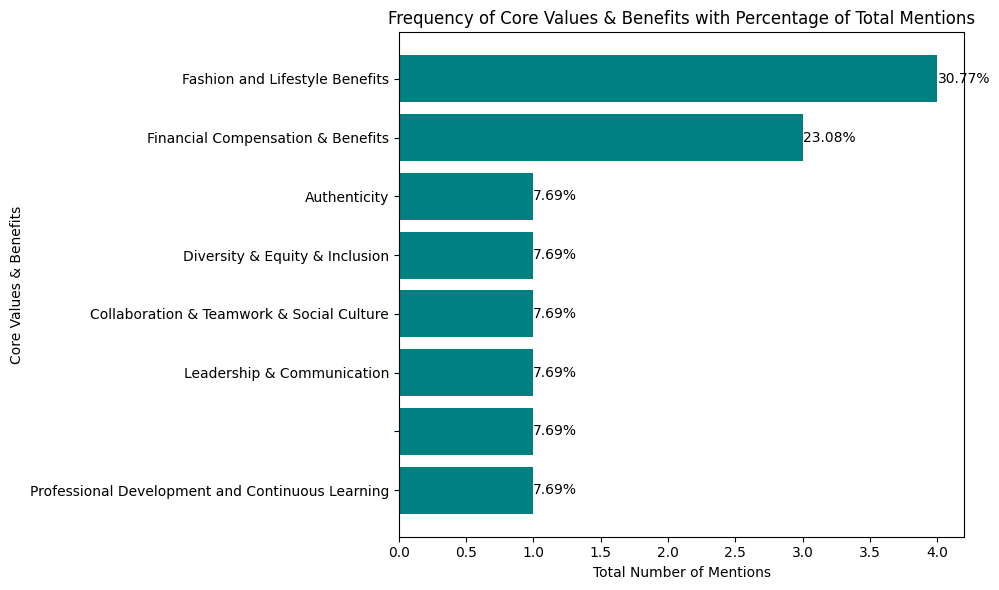

In [39]:
plot_category_distribution(
    df=df_neutral, 
    category_column='summary_class', 
    department_column='department', 
    position_column='position', 
    department='Corporate',  # None includes all departments
    position='manager',    # None includes all positions
    category_map=None, # Optionally filter categories with a map, or leave as None for all categories
    figsize=(10, 6)
)

### Results for employee in Retail

#### All sentiment: 

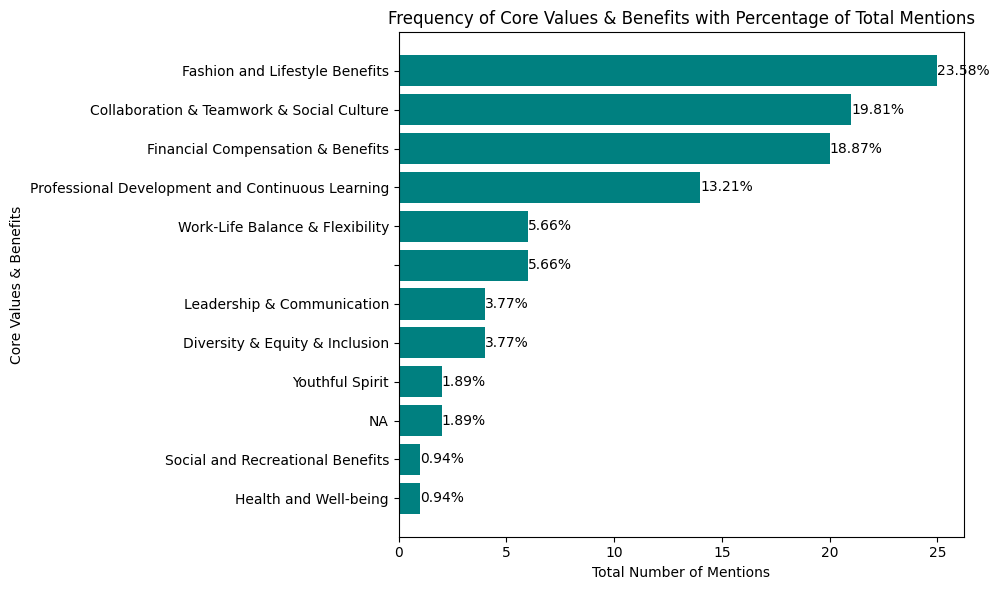

In [40]:
plot_category_distribution(
    df=df, 
    category_column='summary_class', 
    department_column='department', 
    position_column='position', 
    department='Retail',  # None includes all departments
    position='employee',    # None includes all positions
    category_map=None, # Optionally filter categories with a map, or leave as None for all categories
    figsize=(10, 6)
)

#### Positive sentiment: 

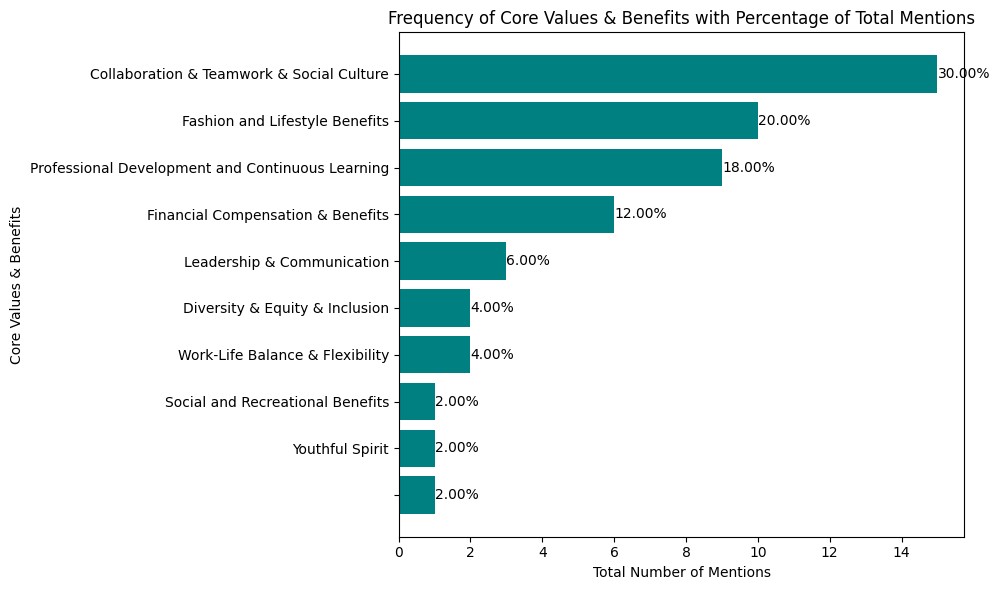

In [41]:
plot_category_distribution(
    df=df_positive, 
    category_column='summary_class', 
    department_column='department', 
    position_column='position', 
    department='Retail',  # None includes all departments
    position='employee',    # None includes all positions
    category_map=None, # Optionally filter categories with a map, or leave as None for all categories
    figsize=(10, 6)
)

#### Negative sentiment: 

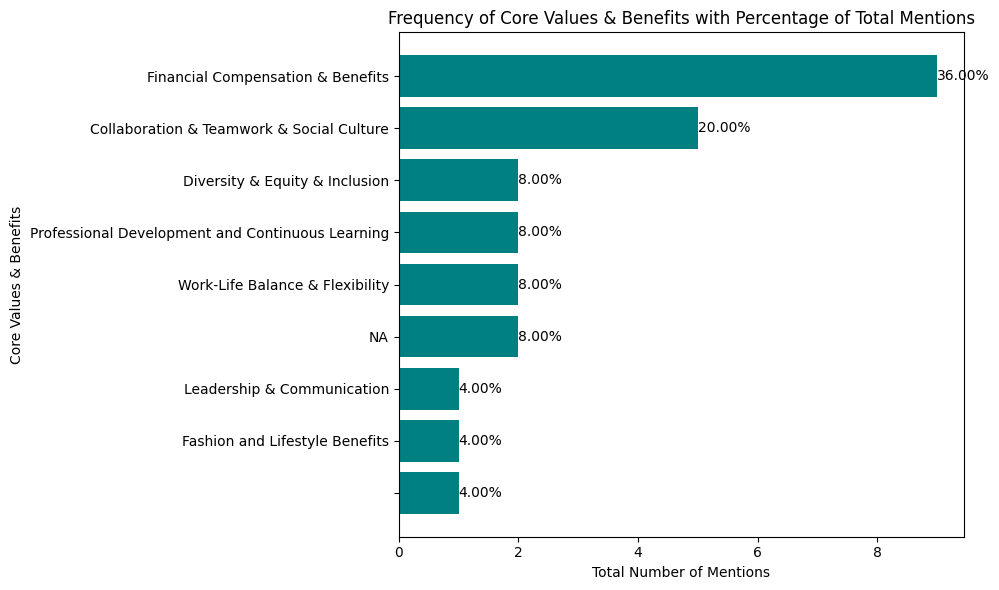

In [42]:
plot_category_distribution(
    df=df_negative, 
    category_column='summary_class', 
    department_column='department', 
    position_column='position', 
    department='Retail',  # None includes all departments
    position='employee',    # None includes all positions
    category_map=None, # Optionally filter categories with a map, or leave as None for all categories
    figsize=(10, 6)
)

#### Neutral sentiment

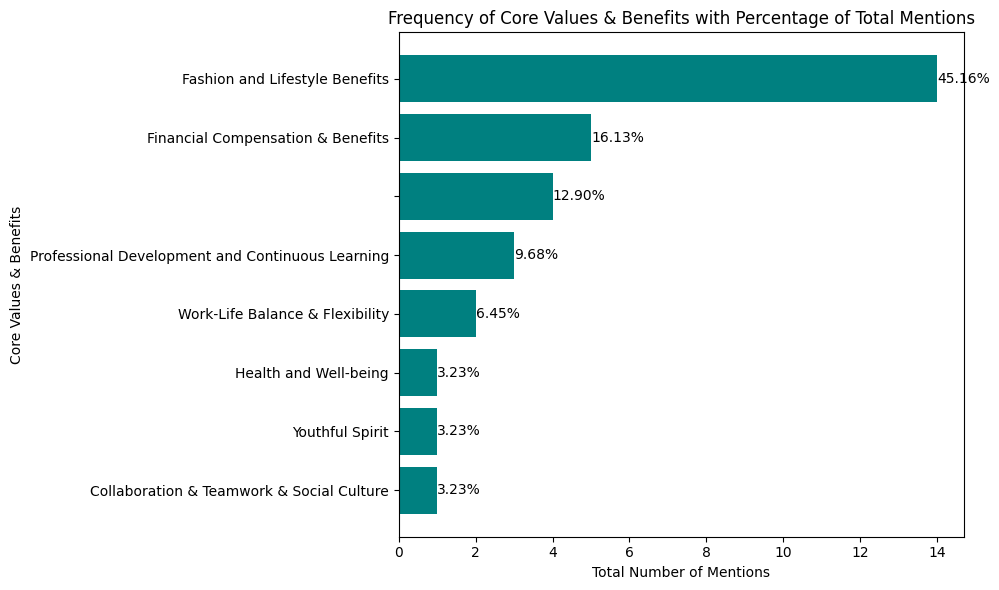

In [43]:
plot_category_distribution(
    df=df_neutral, 
    category_column='summary_class', 
    department_column='department', 
    position_column='position', 
    department='Retail',  # None includes all departments
    position='employee',    # None includes all positions
    category_map=None, # Optionally filter categories with a map, or leave as None for all categories
    figsize=(10, 6)
)

In [44]:
# Saving new summary dataframe to excel file
df.to_excel('summary.xlsx')

### End of the notebook